# Upload Data

Import libraries

In [631]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [632]:
data = pd.read_csv('kc_house_data.csv')

In [633]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [634]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [635]:
data.grade.dtypes

dtype('int64')

# Explore data

## Price

Let's do a histogram of price.

In [636]:
price = data.price.tolist()

In [637]:
price.sort()
price[0:10]

[78000.0,
 80000.0,
 81000.0,
 82000.0,
 82500.0,
 83000.0,
 84000.0,
 85000.0,
 85000.0,
 86500.0]

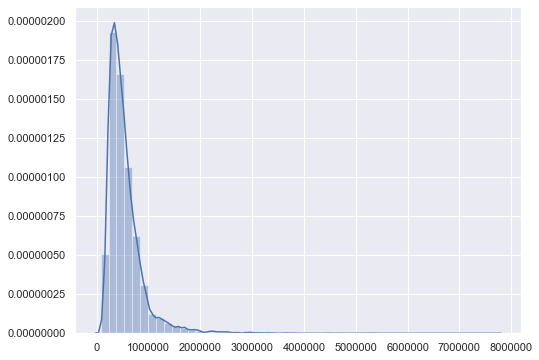

In [638]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(price)

In [639]:
under_100_thou =  sum(1 for i in price if i < 100000)
under_100_thou

24

24 are under $100K

In [640]:
sum(1 for i in price if i >= 100000 and i < 200000)

759

759 are between \\$100,000 and \\$200,000

In [641]:
sum(1 for i in price if i >= 200000 and i < 300000)

3645

3645 are between \\$200,000 and \\$300,000

In [642]:
len(price)

21597

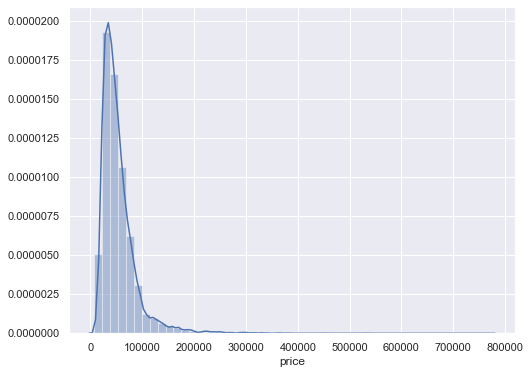

In [643]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(data['price']/10)

In [644]:
len(price)

21597

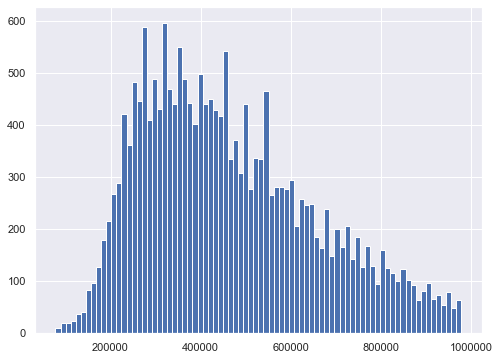

In [645]:
lower_prices = price[0:20000]
# fig = plt.figure(figsize=[15,8])
plt.hist(lower_prices, bins=80) #fig=fig
plt.show()

I see the problem. The dataset is being messed up by a few outiers of multimillion dollar houses. I'm going to try limiting the set to under $250,000

In [646]:
under_two_five = (data[data['price'] < 250000])
under_two_five = under_two_five['price']
under_two_five

0        221900.0
2        180000.0
8        229500.0
18       189000.0
19       230000.0
           ...   
21435    239950.0
21454    249000.0
21534    249000.0
21556    230000.0
21586    224000.0
Name: price, Length: 2297, dtype: float64

Let's try to make a histplot of under $250k 

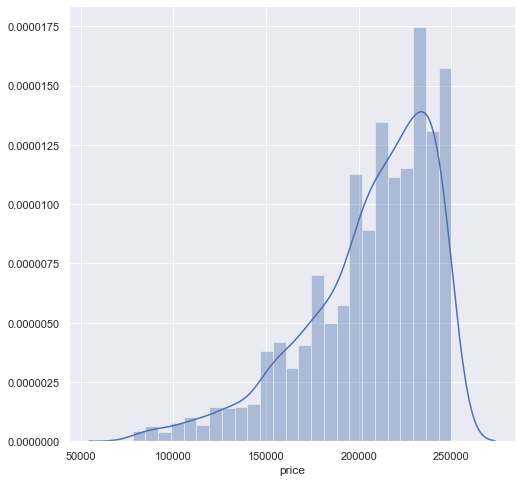

In [647]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(under_two_five)

Let me go a bit higher.

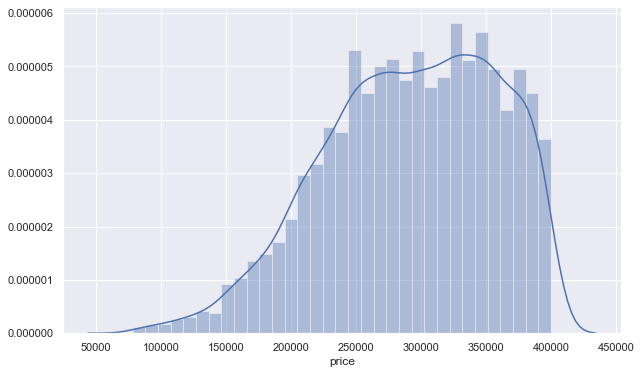

In [648]:
under_4k = (data[data['price'] < 400000])
under_4k = under_4k['price']
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(under_4k)

Up to a million

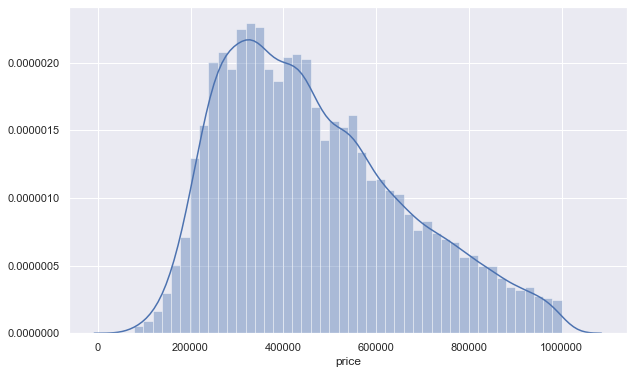

In [649]:
under_1m = (data[data['price'] < 1000000])
under_1m = under_1m['price']
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(under_1m)

That's better. Let's see how many houses are under 1 million

In [650]:
round(len(under_1m)/data.shape[0]*100, 1)

93.1

93% of houses are under $1 million dollars

## Grade

How is it related to price?

In [651]:
grade = data[data.grade.isin([3, 13])] 

In [652]:
grade[['price', 'grade']].sort_values(by = 'price')

,price,grade
3220,262000.0,3
5446,1780000.0,13
13687,2340000.0,13
6035,2390000.0,13
13398,2420000.0,13
4807,2480000.0,13
14542,2890000.0,13
10362,2980000.0,13
7900,3200000.0,13
7028,3800000.0,13


Yes, it does seem to be. The most expensive house is $7,700,000. Let me double check.

In [653]:
data.sort_values(by = 'price').tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


Yes, but note how the second most expensive house is grade 11.

From the the website: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g  
**Grade** - Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.) 

I'd like to see how many buckets there are per grade

In [654]:
data.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Most are in the 7,8,9 area.

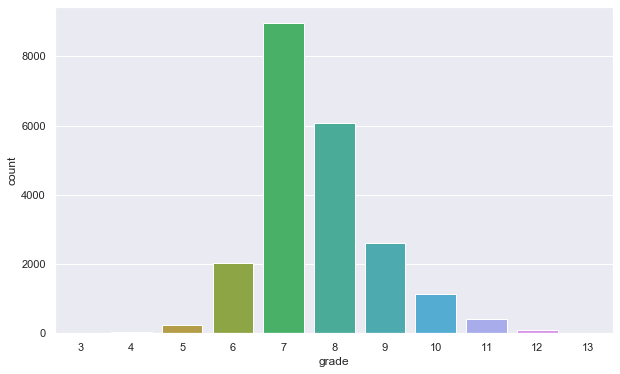

In [655]:
sns.countplot(x=data.grade)

## Waterfront

In [656]:
data.waterfront.nunique()

2

It seems waterfront is categorical, either 0 ,1 or nan. Let's see how many there are.


In [657]:
waterf = data.waterfront.tolist()
len(waterf)

21597

In [658]:
waterf_dict = {'waterfront': 0, 'landlocked': 0, 'nan': 0}
waterf_dict

{'waterfront': 0, 'landlocked': 0, 'nan': 0}

In [659]:
for x in waterf:
    if x == 0.0:
        waterf_dict['landlocked'] += 1
    elif x == 1.0:
        waterf_dict['waterfront'] += 1
    else:
        waterf_dict['nan'] += 1
waterf_dict

{'waterfront': 146, 'landlocked': 19075, 'nan': 2376}

In [660]:
len(waterf)

21597

In [661]:
print(2376/21597)
146+19075+2376

0.11001527989998611


21597

Note that 11% of the the listings don't know if it's waterfront or not - NaN

## View

Not sure what "view" means. In the glossary, it's "has been viewed", but the value_counts are integers 0 - 4

In [662]:
data.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

It's too uncertain and weird how the majority of houses have been viewed 0 times. I'll focus on other variables.

## Bedrooms

In [663]:
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

## Yr. Built

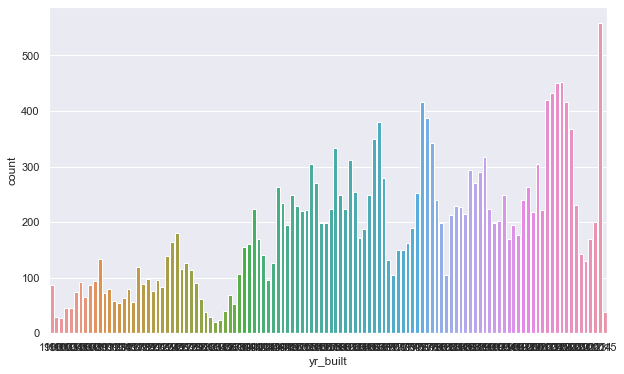

In [664]:
sns.countplot(x=data.yr_built)

In [665]:
data.yr_built.nunique()

116

In [666]:
min(data.yr_built)

1900

In [667]:
max(data.yr_built)

2015

All houses in the set were built between 1900 and 2015.

## Year renovated

In [668]:
data.yr_renovated.dtype

dtype('float64')

In [669]:
data.yr_renovated[0:10]

0       0.0
1    1991.0
2       NaN
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
Name: yr_renovated, dtype: float64

For the year renovated, it seems that there are zeros if it has never been renovated.

In [670]:
yr_renov = data.yr_renovated.to_list()

In [671]:
yr_renov.count(0)

17011

In [672]:
yr_renov = data.yr_renovated.dropna().to_list()

In [673]:
len(yr_renov)

17755

In [674]:
round(1 - len(yr_renov)/data.shape[0], 3)*100

17.8

17.9% of the yr_renovated are NaN

In [675]:
from collections import Counter
Counter(yr_renov)

Counter({0.0: 17011,
         1991.0: 16,
         2002.0: 17,
         2010.0: 15,
         1992.0: 13,
         2013.0: 31,
         1994.0: 14,
         1978.0: 3,
         2005.0: 29,
         2003.0: 31,
         1984.0: 16,
         1954.0: 1,
         2014.0: 73,
         2011.0: 9,
         1983.0: 15,
         1945.0: 3,
         1990.0: 22,
         1988.0: 11,
         1977.0: 7,
         1981.0: 4,
         1995.0: 12,
         2000.0: 29,
         1999.0: 15,
         1998.0: 16,
         1970.0: 9,
         1989.0: 20,
         2004.0: 22,
         1986.0: 14,
         2007.0: 30,
         1987.0: 14,
         2006.0: 20,
         1985.0: 14,
         2001.0: 15,
         1980.0: 8,
         1971.0: 1,
         1979.0: 7,
         1997.0: 12,
         1950.0: 1,
         1969.0: 4,
         1948.0: 1,
         2009.0: 21,
         2015.0: 14,
         1974.0: 2,
         2008.0: 15,
         1968.0: 7,
         2012.0: 8,
         1963.0: 4,
         1951.0: 1,
         1

17011 were never renovated.

In [676]:
round(100 - (17011/17755 * 100), 1)

4.2

Only 4.2% of houses were renovated. Actually even less because of all the NaN's I took out.

## Zip codes

In [677]:
data.zipcode.nunique()

70

Data set covers 70 zip codes.

## Date range

In [678]:
data.date.dtypes

dtype('O')

It's a string. Make it a number.

In [679]:
data.date[0]

'10/13/2014'

In [680]:
int(data.date[0][-4:])

2014

In [681]:
dates = data.date.to_list()

In [682]:
dates = [int(str[-4:]) for str in dates]

In [683]:
max(dates)

2015

In [684]:
min(dates)

2014

All dates are between 2014 and 2015. 

# Relationships between variables

## How many NaN's?

In [685]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Scatter plots

### yr_built vs. grade

See the relation between year and grade

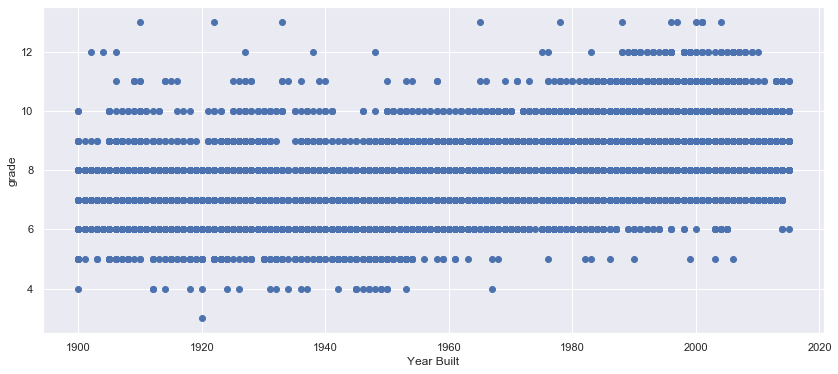

In [686]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.grade)
plt.xlabel("Year Built")
plt.ylabel("grade")
plt.show()

Newer houses seem more likely to have higher grades, and vice versa.

### yr_built vs. price

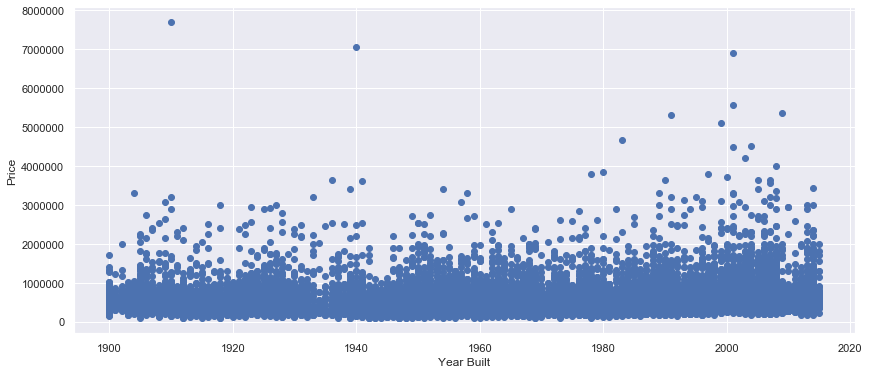

In [687]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.price)
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()

No obvious relationship

### bedrooms vs. price

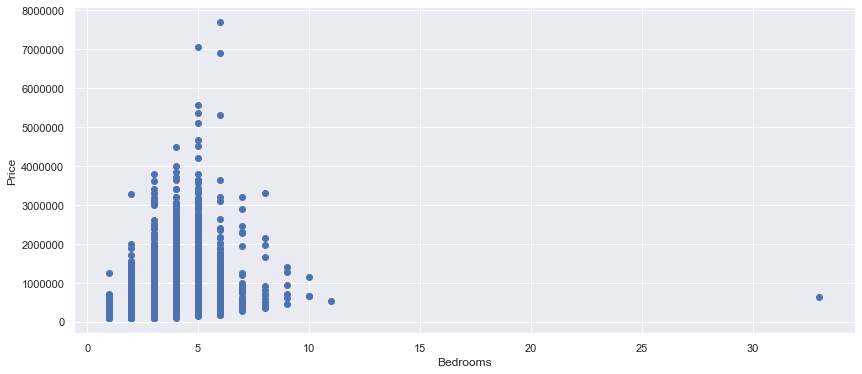

In [688]:
plt.figure(figsize=(14,6))
plt.scatter(data.bedrooms, data.price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

No obvious relationship

### sqft_lot vs. price

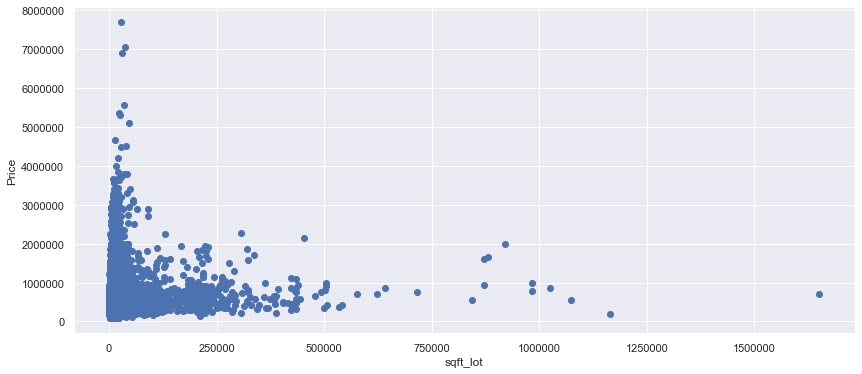

In [689]:
plt.figure(figsize=(14,6))
plt.scatter(data.sqft_lot, data.price)
plt.xlabel("sqft_lot")
plt.ylabel("Price")
plt.show()

### grade vs. price

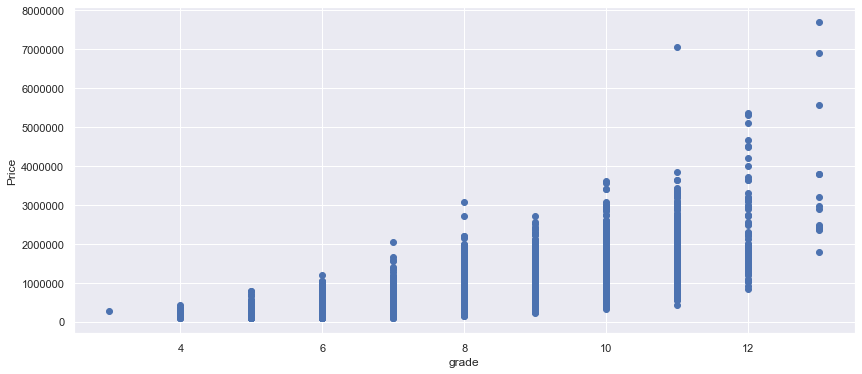

In [690]:
plt.figure(figsize=(14,6))
plt.scatter(data.grade, data.price)
plt.xlabel("grade")
plt.ylabel("Price")
plt.show()

It seems Grade and Price have the strongest linear relationship so far

### yr_built vs sqft_living 15

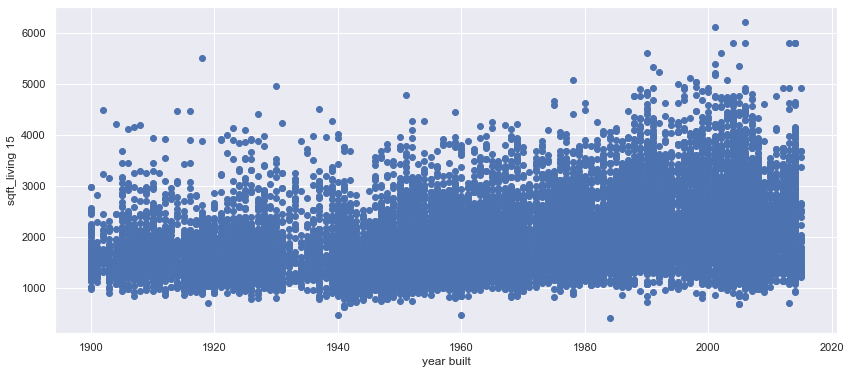

In [691]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.sqft_living15)
plt.xlabel("year built")
plt.ylabel("sqft_living 15")
plt.show()

### yr_built vs. bathrooms

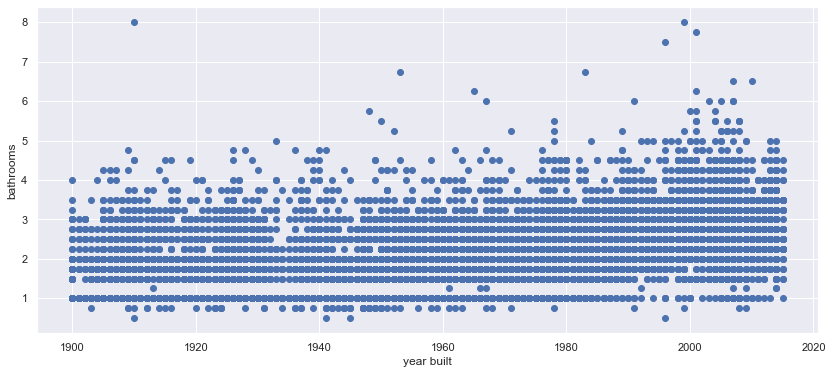

In [692]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.bathrooms)
plt.xlabel("year built")
plt.ylabel("bathrooms")
plt.show()

### yr_built vs. bedrooms

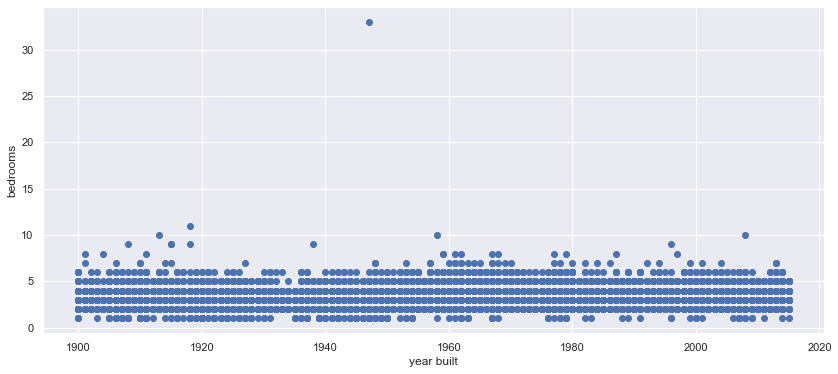

In [693]:
plt.figure(figsize=(14,6))
plt.scatter(data.yr_built, data.bedrooms)
plt.xlabel("year built")
plt.ylabel("bedrooms")
plt.show()

I'm tired of this one house with 33 bedrooms

In [694]:
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [695]:
df = data.loc[data['bedrooms'] != 33]

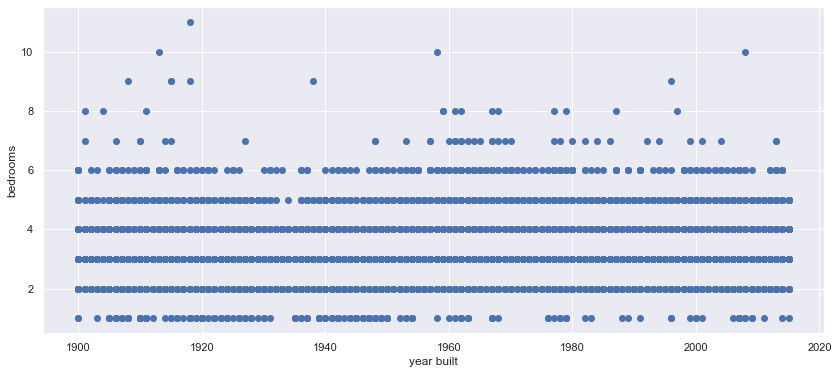

In [696]:
plt.figure(figsize=(14,6))
plt.scatter(df.yr_built, df.bedrooms)
plt.xlabel("year built")
plt.ylabel("bedrooms")
plt.show()

### condition vs. grade

In [697]:
cond_grade = data[['condition', 'grade']]

In [698]:
data.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

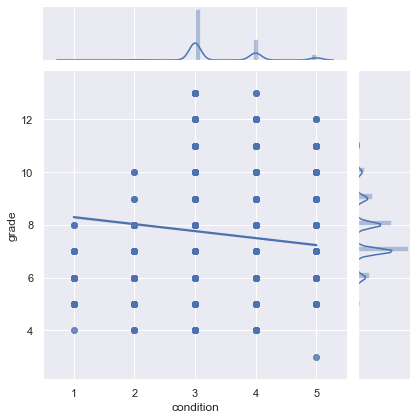

In [699]:
sns.jointplot(x = data.condition,y=data.grade, kind='reg')

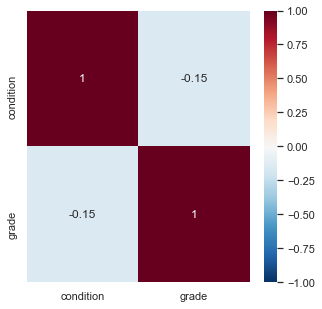

In [700]:
correlation = cond_grade.corr()
plt.figure(figsize=(5,5))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Weird how it's:
- **condition** - How good the condition is (Overall)
- **grade** - overall grade given to the housing unit, based on King County grading system

But they show no relation.

# Adding Zipcode Data

## Loading data and merging dataframes

In [811]:
zip = data.zipcode.tolist()

In [702]:
pop = pd.read_csv('pop-by-zip-code.csv')

In [703]:
pop.head()

,zip_code,y-2015
0,90001,57227
1,90002,50626
2,90003,69502
3,90004,64008
4,90005,38979


Merging the dataframes

In [704]:
data2 = pd.merge(data, pop, left_on='zipcode', right_on='zip_code')

In [705]:
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,y-2015
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,98178,25363
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,98178,25363
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,98178,25363
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,98178,25363
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,98178,25363


Verifying they're the same size

In [706]:
data.shape

(21597, 21)

In [707]:
data2.shape

(21597, 23)

Renaming and dropping extra columns

In [708]:
data2.drop(['zip_code'], axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,y-2015
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,25363
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,25363
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,25363
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,1300,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,25363
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,25363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,0.0,0.0,...,3990,0.0,1989,NaN,98039,47.6177,-122.229,3450,16087,3120
21593,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,0.0,0.0,...,4065,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713,3120
21594,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,0.0,...,3410,0.0,2006,0.0,98039,47.6295,-122.236,3410,16236,3120
21595,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,0.0,1.0,...,5190,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250,3120


In [709]:
data2 = data2.rename(columns={'y-2015':'zipcode_pop'})

In [710]:
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,98178,25363
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,98178,25363
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,98178,25363
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,98178,25363
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,98178,25363


## Listings per zipcode

I want to figure out how population affects home prices. I'll do listings per zip.  

In [711]:
listings_in_zip = data2.groupby(['zip_code'])['id'].count()

In [712]:
listings_in_zip

zip_code
98001    361
98002    199
98003    280
98004    317
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    317
Name: id, Length: 70, dtype: int64

In [713]:
listings_in_zip = listings_in_zip.to_frame()

In [714]:
listings_in_zip = listings_in_zip.rename(columns={'id':'listings_in_zip'})

In [715]:
listings_in_zip

,listings_in_zip
zip_code,
98001,361
98002,199
98003,280
98004,317
98005,168
...,...
98177,255
98178,262
98188,136


In [716]:
data3 = pd.merge(data2, listings_in_zip, left_on='zip_code', right_on='zip_code')

In [717]:
data3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,98178,25363,262
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,1945,0.0,98178,47.5009,-122.248,1190,6780,98178,25363,262
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,1967,0.0,98178,47.5091,-122.244,2660,8712,98178,25363,262
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,1961,NaN,98178,47.5053,-122.255,1320,7619,98178,25363,262
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,1931,0.0,98178,47.5048,-122.272,1650,8775,98178,25363,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,0.0,0.0,...,1989,NaN,98039,47.6177,-122.229,3450,16087,98039,3120,50
21593,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,0.0,0.0,...,1987,0.0,98039,47.6209,-122.237,3070,18713,98039,3120,50
21594,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,0.0,...,2006,0.0,98039,47.6295,-122.236,3410,16236,98039,3120,50
21595,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,0.0,1.0,...,2013,0.0,98039,47.6102,-122.225,3840,19250,98039,3120,50


In [718]:
data3.sort_values(by=["listings_in_zip"])


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip
21596,3262300818,2/27/2015,1870000.0,4,3.75,3790,8797,2.0,0.0,0.0,...,2006,NaN,98039,47.6351,-122.236,2660,12150,98039,3120,50
21568,5425700205,5/20/2014,1800000.0,4,3.50,4460,16953,1.0,NaN,0.0,...,1962,NaN,98039,47.6338,-122.232,1980,13370,98039,3120,50
21567,3262300322,4/8/2015,1650000.0,4,3.25,3640,13530,1.0,0.0,0.0,...,1924,2000.0,98039,47.6293,-122.238,2760,15000,98039,3120,50
21566,5425700150,8/4/2014,787500.0,4,1.75,1580,9382,1.0,0.0,0.0,...,1963,0.0,98039,47.6353,-122.232,2010,9382,98039,3120,50
21565,3738000070,3/9/2015,1710000.0,5,2.50,2660,6572,1.0,0.0,0.0,...,1959,0.0,98039,47.6176,-122.223,3960,14595,98039,3120,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,4310701575,6/10/2014,429000.0,3,3.25,1410,1246,3.0,0.0,0.0,...,2005,0.0,98103,47.6981,-122.340,1410,1253,98103,48600,602
5266,1931300688,4/29/2015,533000.0,3,3.00,1280,1085,3.0,0.0,0.0,...,2004,0.0,98103,47.6569,-122.346,1300,1310,98103,48600,602
5267,4083302485,4/20/2015,913000.0,3,1.75,2170,4000,1.0,0.0,0.0,...,1925,NaN,98103,47.6546,-122.337,1890,4000,98103,48600,602
5259,2402100205,11/19/2014,412133.0,2,1.00,920,4400,1.0,0.0,0.0,...,1948,0.0,98103,47.6903,-122.332,1560,4600,98103,48600,602


## Engineer hot_market_score column

The hot market score is calculated as a ratio of the number of home for sale in the zip code per the zip code population. 

In [719]:
data3['hot_market_score'] = round(((data3['listings_in_zip']/data3['zipcode_pop'])*1000), 1)

In [720]:
data3.hot_market_score

0        10.3
1        10.3
2        10.3
3        10.3
4        10.3
         ... 
21592    16.0
21593    16.0
21594    16.0
21595    16.0
21596    16.0
Name: hot_market_score, Length: 21597, dtype: float64

In [721]:
data3.sort_values(by=['hot_market_score'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip,hot_market_score
16220,2422049104,12/30/2014,235000.0,2,1.00,830,9000,1.0,0.0,0.0,...,0.0,98032,47.3813,-122.243,1160,7680,98032,36368,125,3.4
16249,1253200290,2/12/2015,265000.0,4,1.75,1860,9112,1.0,0.0,0.0,...,0.0,98032,47.3792,-122.282,1570,9112,98032,36368,125,3.4
16248,3832600080,5/4/2015,270000.0,3,2.25,1740,7345,1.0,0.0,0.0,...,0.0,98032,47.3663,-122.285,1770,8250,98032,36368,125,3.4
16247,1440700190,6/23/2014,269950.0,4,2.50,2540,8400,2.0,0.0,0.0,...,0.0,98032,47.3754,-122.277,1600,8050,98032,36368,125,3.4
16246,3832500790,4/20/2015,309000.0,4,2.00,2240,9240,1.0,0.0,0.0,...,0.0,98032,47.3666,-122.288,2040,8250,98032,36368,125,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17613,7852011070,1/9/2015,1140000.0,6,3.75,5960,20197,2.0,0.0,4.0,...,NaN,98065,47.5398,-121.869,3860,12800,98065,13977,308,22.0
17612,7852110070,6/8/2014,567500.0,3,2.50,2300,7398,2.0,0.0,0.0,...,0.0,98065,47.5369,-121.876,2580,6983,98065,13977,308,22.0
17611,7853301930,10/9/2014,405000.0,3,2.50,1960,6997,2.0,0.0,0.0,...,0.0,98065,47.5415,-121.887,2320,5178,98065,13977,308,22.0
17618,7853250070,4/17/2015,679975.0,4,2.50,3830,4644,2.0,0.0,0.0,...,0.0,98065,47.5384,-121.880,3400,6163,98065,13977,308,22.0


### Explore new variable

#### View scatter plots

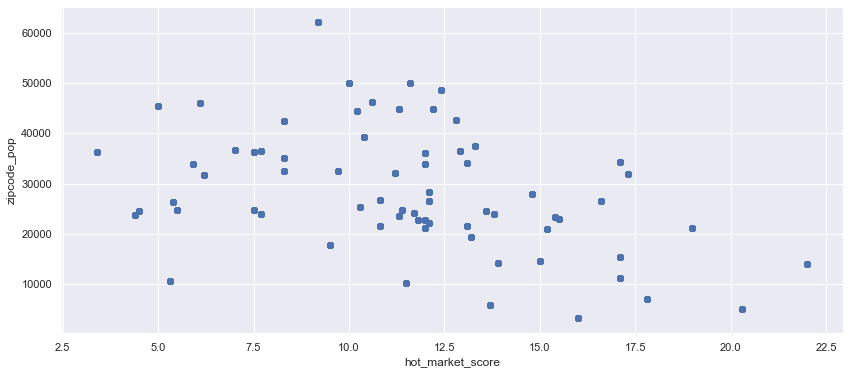

In [722]:
plt.figure(figsize=(14,6))
plt.scatter(data3.hot_market_score, data3.zipcode_pop)
plt.xlabel("hot_market_score")
plt.ylabel("zipcode_pop")
plt.show()

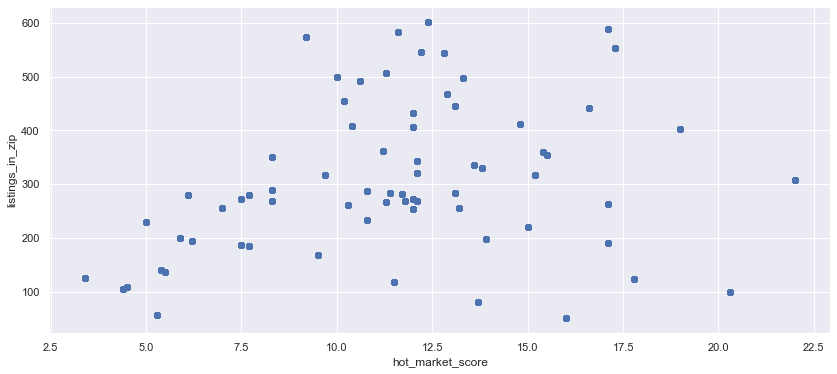

In [723]:
plt.figure(figsize=(14,6))
plt.scatter(data3.hot_market_score, data3.listings_in_zip)
plt.xlabel("hot_market_score")
plt.ylabel("listings_in_zip")
plt.show()

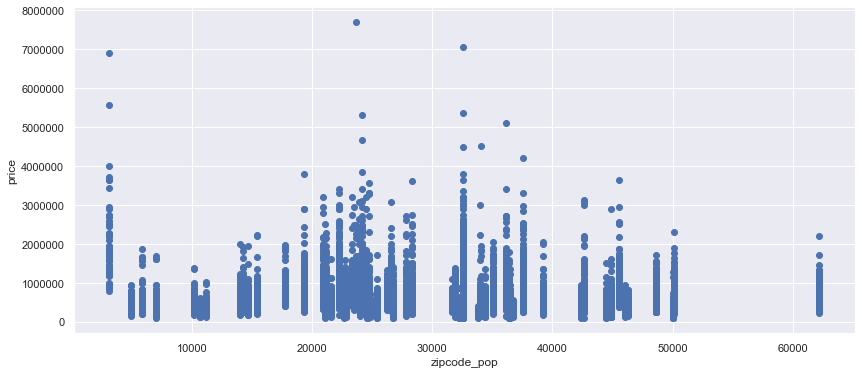

In [724]:
plt.figure(figsize=(14,6))
plt.scatter(data3.zipcode_pop, data3.price)
plt.xlabel("zipcode_pop")
plt.ylabel("price")
plt.show()

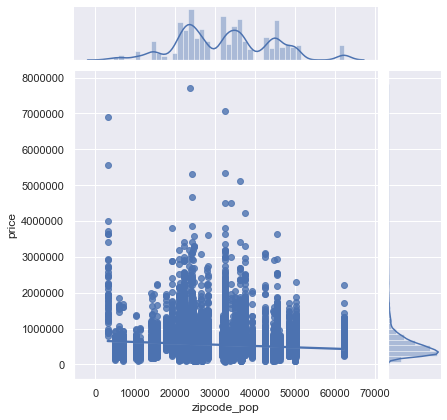

In [725]:
sns.jointplot(x = data3.zipcode_pop,y=data3.price, data=data3, kind='reg')

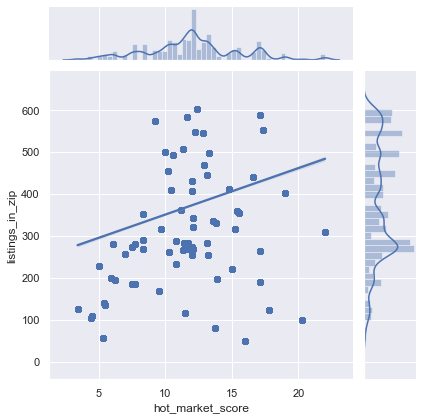

In [726]:
sns.jointplot(x = data3.hot_market_score,y=data3.listings_in_zip, kind='reg')

#### See which zips tend to have expensive houses

In [727]:
price_zip_mean = data3.groupby(['zip_code'])['price'].mean()

In [728]:
price_zip_mean = price_zip_mean.to_frame()
price_zip_mean

,price
zip_code,
98001,2.811949e+05
98002,2.342840e+05
98003,2.941113e+05
98004,1.356524e+06
98005,8.102897e+05
...,...
98177,6.764194e+05
98178,3.106128e+05
98188,2.890783e+05


In [729]:
price_zip_mean = price_zip_mean.rename(columns={'price':'price_zip_mean'})

In [730]:
price_zip_mean.head()

,price_zip_mean
zip_code,
98001,2.811949e+05
98002,2.342840e+05
98003,2.941113e+05
98004,1.356524e+06
98005,8.102897e+05


## Add mean price of houses in zip codes to dataframe

In [731]:
data3 = pd.merge(data3, price_zip_mean, left_on='zip_code', right_on='zip_code')
data3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip,hot_market_score,price_zip_mean
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,98178,47.5112,-122.257,1340,5650,98178,25363,262,10.3,310612.755725
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,98178,47.5009,-122.248,1190,6780,98178,25363,262,10.3,310612.755725
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,98178,47.5091,-122.244,2660,8712,98178,25363,262,10.3,310612.755725
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,98178,47.5053,-122.255,1320,7619,98178,25363,262,10.3,310612.755725
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,98178,47.5048,-122.272,1650,8775,98178,25363,262,10.3,310612.755725


In [732]:
data3.price_zip_mean.describe()

count    2.159700e+04
mean     5.402966e+05
std      2.344425e+05
min      2.342840e+05
25%      3.594963e+05
50%      4.936253e+05
75%      6.452442e+05
max      2.161300e+06
Name: price_zip_mean, dtype: float64

In [733]:
data3.price_zip_mean.nunique()

70

Drop the extra zip code column

In [734]:
data3 = data3.drop(['zip_code'], axis=1)

In [735]:
data3.to_csv('kc_house_data_with_zip_data.csv')

In [736]:
# Renaming the df 'with_zip_data'

## Remove all the individual house data and just use zip code data

In [737]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  int64  
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  int64  
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  int64  
 6   sqft_lot          21597 non-null  int64  
 7   floors            21597 non-null  float64
 8   waterfront        19221 non-null  float64
 9   view              21534 non-null  float64
 10  condition         21597 non-null  int64  
 11  grade             21597 non-null  int64  
 12  sqft_above        21597 non-null  int64  
 13  sqft_basement     21597 non-null  object 
 14  yr_built          21597 non-null  int64  
 15  yr_renovated      17755 non-null  float64
 16  zipcode           21597 non-null  int64 

In [738]:
data_zip = data3.drop_duplicates(subset=['zipcode'], keep='first')

In [739]:
len(data_zip)

70

In [740]:
col_names = list(data3.columns)
col_names             

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'zipcode_pop',
 'listings_in_zip',
 'hot_market_score',
 'price_zip_mean']

In [741]:
cols_to_keep = [
 'zipcode',
 'zipcode_pop',
 'listings_in_zip',
 'hot_market_score',
 'price_zip_mean']

In [742]:
cols_to_drop = []
for name in col_names:
    if name not in cols_to_keep:
        cols_to_drop.append(name)
cols_to_drop

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [743]:
data_zip = data_zip.drop(cols_to_drop, axis=1)
data_zip.head()

,zipcode,zipcode_pop,listings_in_zip,hot_market_score,price_zip_mean
0,98178,25363,262,10.3,310612.755725
262,98125,39254,409,10.4,469928.767726
671,98028,21568,283,13.1,462488.869258
954,98136,15415,263,17.1,551768.520913
1217,98074,26530,441,16.6,685675.843537


## Explore zip code data

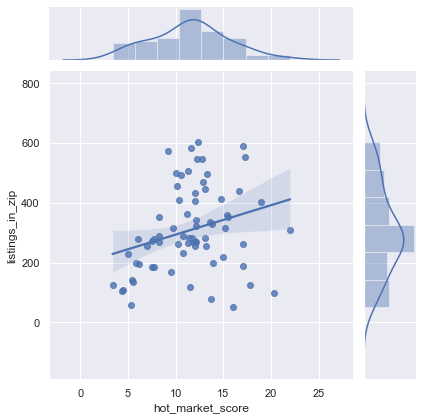

In [744]:
sns.jointplot(x = data_zip.hot_market_score,y=data_zip.listings_in_zip, kind='reg')

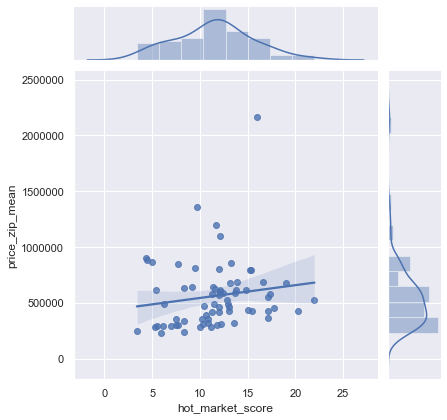

In [745]:
sns.jointplot(x = data_zip.hot_market_score,y=data_zip.price_zip_mean, kind='reg')

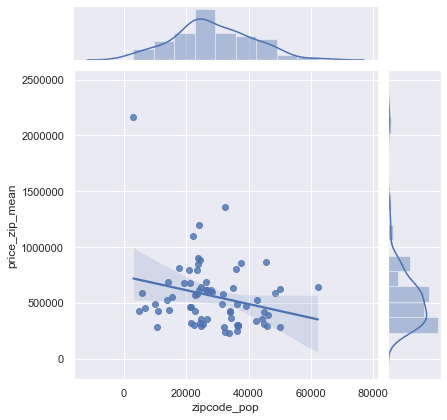

In [746]:
sns.jointplot(x = data_zip.zipcode_pop,y=data_zip.price_zip_mean, kind='reg')

In [747]:
data_zip.sort_values(by=['listings_in_zip'], ascending = False)

,zipcode,zipcode_pop,listings_in_zip,hot_market_score,price_zip_mean
5032,98103,48600,602,12.4,5.850488e+05
2909,98038,34362,589,17.1,3.670915e+05
3639,98115,50134,583,11.6,6.199441e+05
7668,98052,62216,574,9.2,6.452442e+05
8654,98117,31921,553,17.3,5.768348e+05
...,...,...,...,...,...
16504,98102,23655,104,4.4,8.996077e+05
15235,98010,4918,100,20.3,4.236660e+05
19863,98024,5847,80,13.7,5.861209e+05
11299,98148,10659,57,5.3,2.849086e+05


Because I'm going to merge this df back with the other df, I'm going to remove `price_zip_mean`. I'll already have prices in the other one. 

In [748]:
data_zip.drop(['price_zip_mean'], axis=1, inplace=True)

In [749]:
data_zip

,zipcode,zipcode_pop,listings_in_zip,hot_market_score
0,98178,25363,262,10.3
262,98125,39254,409,10.4
671,98028,21568,283,13.1
954,98136,15415,263,17.1
1217,98074,26530,441,16.6
...,...,...,...,...
20746,98072,22779,273,12.0
21019,98188,24836,136,5.5
21155,98014,6973,124,17.8
21279,98055,22659,268,11.8


Save it.

In [750]:
data_zip.to_csv('kc_housing_zip_data.csv')

# Merge population dataframe with main dataframe

## Merge 

In [751]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [752]:
data_zip.head()

,zipcode,zipcode_pop,listings_in_zip,hot_market_score
0,98178,25363,262,10.3
262,98125,39254,409,10.4
671,98028,21568,283,13.1
954,98136,15415,263,17.1
1217,98074,26530,441,16.6


In [753]:
data = pd.merge(data, data_zip, left_on='zipcode', right_on='zipcode')

In [754]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  int64  
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  int64  
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  int64  
 6   sqft_lot          21597 non-null  int64  
 7   floors            21597 non-null  float64
 8   waterfront        19221 non-null  float64
 9   view              21534 non-null  float64
 10  condition         21597 non-null  int64  
 11  grade             21597 non-null  int64  
 12  sqft_above        21597 non-null  int64  
 13  sqft_basement     21597 non-null  object 
 14  yr_built          21597 non-null  int64  
 15  yr_renovated      17755 non-null  float64
 16  zipcode           21597 non-null  int64 

## Drop columns

**Columns to drop:**  
 - date - don't care when house was sold. All in the same 9 months  
 - id - house id not important  
 - view - My goal is to look into qualities of the houses, not the sales process  
 - condition - concept overlaps with 'grade'. Don't want to use both.  
 - lat - I'll use zip codes, but not looking into that specific geography 
 - long - same as above  
 
 I'll probably also drop some square footage stuff after I look into it some based on collinearity  



In [755]:
to_drop = ['id', 'date', 'view', 'condition', 'lat', 'long']

data.drop(to_drop, axis=1, inplace=True)

data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,zipcode_pop,listings_in_zip,hot_market_score
0,221900.0,3,1.0,1180,5650,1.0,NaN,7,1180,0.0,1955,0.0,98178,1340,5650,25363,262,10.3


## Check for collinearity of area-based columns

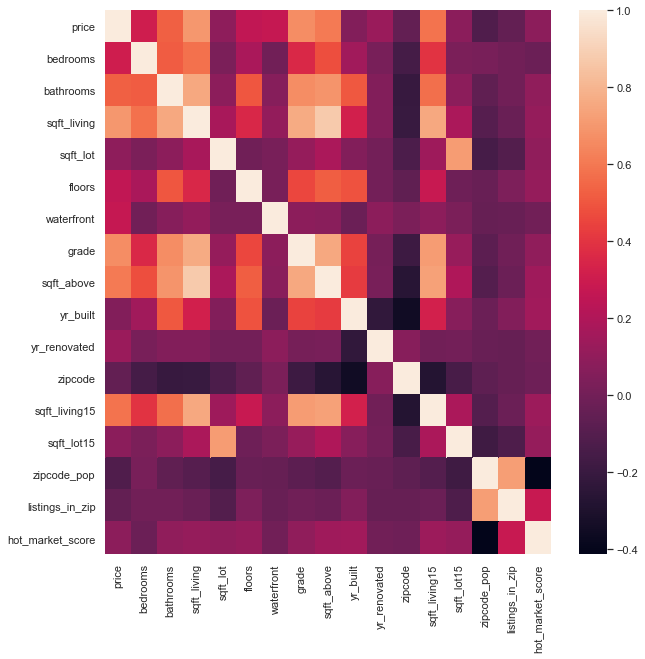

In [756]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr());

In [757]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_above            int64
sqft_basement        object
yr_built              int64
yr_renovated        float64
zipcode               int64
sqft_living15         int64
sqft_lot15            int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
dtype: object

In [758]:
area_categs = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

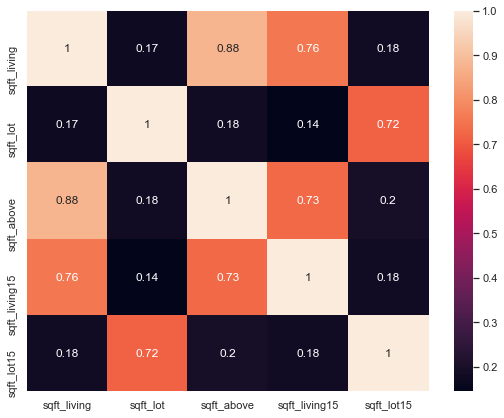

In [759]:
plt.figure(figsize=(9,7))
sns.heatmap(data[area_categs].corr(), annot=True);

**High correlations:**
- sqft_living/sqft_above  
- sqft_living/sqft_living15  

I'll take those out of the heatmap and recheck:

In [760]:
area_categs = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_lot15']

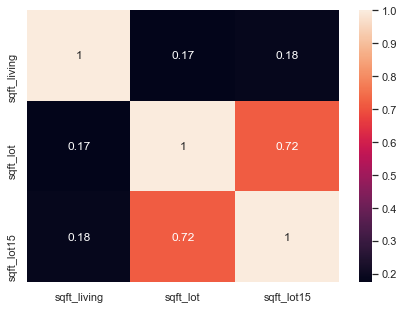

In [761]:
plt.figure(figsize=(7,5))
sns.heatmap(data[area_categs].corr(), annot=True);

**High correlations:**
- sqft_lot/sqft_lot15  

So I'll remove from the dataframe:
- sqft_above  
- sqft_living15  
- sqft_lot15  

## Drop collinear columns

In [762]:
to_drop = ['sqft_above', 'sqft_living15', 'sqft_lot15']
data.drop(to_drop, axis=1, inplace=True)

In [763]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
0,221900.0,3,1.0,1180,5650,1.0,NaN,7,0.0,1955,0.0,98178,25363,262,10.3


## Convert datatypes and deal with NaN's

In [764]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_basement        object
yr_built              int64
yr_renovated        float64
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
dtype: object

In [765]:
data.sqft_basement

0          0.0
1          0.0
2        480.0
3          0.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596    500.0
Name: sqft_basement, Length: 21597, dtype: object

`data.sqft_basement = data.sqft_basement.astype(float)` doesn't work. Must be some weird characters in it.

In [766]:
data.sqft_basement.tolist()[0:20]

['0.0',
 '0.0',
 '480.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '140.0',
 '0.0',
 '970.0',
 '0.0',
 '920.0',
 '0.0',
 '670.0']

I see there are a lot of '?' in it.

In [767]:
data.sqft_basement.tolist().count('?')

454

In [768]:
data.sqft_basement.tolist().count('?')/len(data)

0.021021438162707785

Just about 2% are question marks. I'll just assume these homes have no basement.

In [769]:
data.sqft_basement = data.sqft_basement.replace(to_replace='?', value='0.0')

Now, I'll convert them to floats

In [770]:
data.sqft_basement = data.sqft_basement.astype(float)

Converting bathroom to integer...

I was going to do: `data.bathrooms = data.bathrooms.astype(int)` but I see that there are half bathrooms, etc. so I'll leave that alone.

In [771]:
data.bathrooms.tolist()[0:10]

[1.0, 1.0, 2.25, 1.0, 1.0, 1.75, 1.0, 1.0, 1.5, 2.0]

Converting yr_renovated to integer

`data.yr_renovated = data.yr_renovated.astype(int)` gives me an error. Might be some weird data in there.

In [772]:
data.yr_renovated.tolist()[0:10]

[0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 1983.0]

I see there are some `nan`. Will change to 0.

In [773]:
data.yr_renovated.isna().sum()/len(data)

0.17789507802009538

18% has no data as to whether was renovated. I'm going to convert those to 0, in particular because I plan to only look at "recently renovated" later on, and if something was recently renovated, it should be have a date. 

In [774]:
data.yr_renovated = data.yr_renovated.fillna(0)

In [775]:
data.yr_renovated = data.yr_renovated.astype(int)

In [776]:
data.yr_renovated

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated, Length: 21597, dtype: int32

Check out waterfront

In [777]:
data.waterfront.isna().sum()/len(data)

0.11001527989998611

11% of waterfront is nan. But I'll convert that to 0, because if something had a waterfront, it would likely be known.

In [778]:
data.waterfront = data.waterfront.fillna(0)

Any more Nan's? Nope...

In [779]:
data.isnull().any()

price               False
bedrooms            False
bathrooms           False
sqft_living         False
sqft_lot            False
floors              False
waterfront          False
grade               False
sqft_basement       False
yr_built            False
yr_renovated        False
zipcode             False
zipcode_pop         False
listings_in_zip     False
hot_market_score    False
dtype: bool

## Check for outliers

### Bedrooms

One of the bedrooms is off

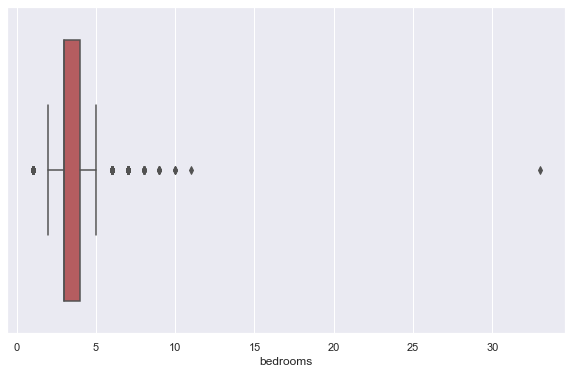

In [780]:
sns.boxplot(x=data['bedrooms'], color='r')

In [781]:
data[data.bedrooms > 20]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
5423,640000.0,33,1.75,1620,6000,1.0,0.0,7,580.0,1947,0,98103,48600,602,12.4


I'll remove this one.

In [782]:
data.drop([5423], inplace=True)

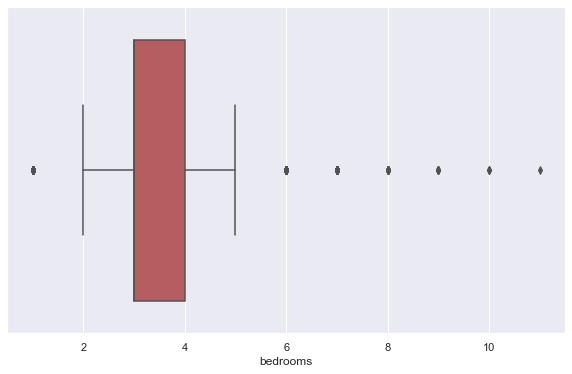

In [783]:
sns.boxplot(x=data['bedrooms'], color='r')

### Bathrooms

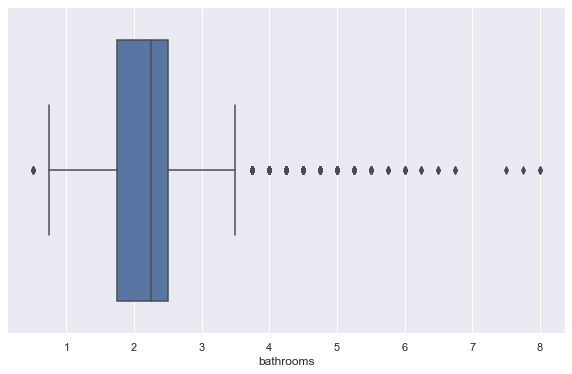

In [784]:
sns.boxplot(x=data['bathrooms'], color='b')

### sqft_living

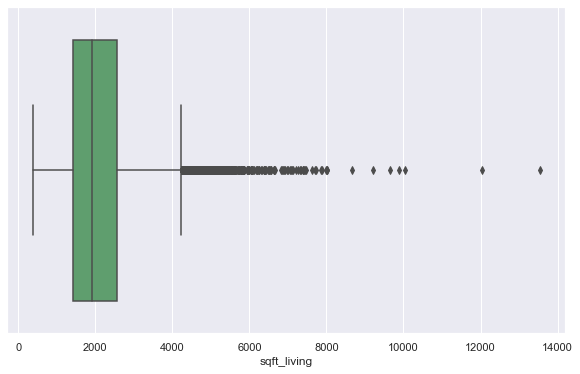

In [785]:
sns.boxplot(x=data['sqft_living'], color='g')

In [786]:
data[data.sqft_living > 11000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
1897,2280000.0,7,8.0,13540,307752,3.0,0.0,12,4130.0,1999,0,98053,21185,403,19.0
16536,7700000.0,6,8.0,12050,27600,2.5,0.0,13,3480.0,1910,1987,98102,23655,104,4.4


I'll drop those two mansions.

In [787]:
data.drop(data[data.sqft_living > 11000].index, inplace = True) 

### sqft_lot

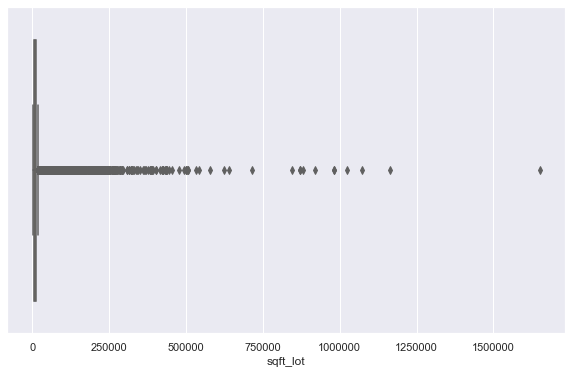

In [788]:
sns.boxplot(x=data['sqft_lot'], color='y')

In [789]:
data[data.sqft_lot > 1250000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
18767,700000.0,4,1.0,1300,1651359,1.0,0.0,6,0.0,1920,0,98022,21567,233,10.8


I'll get rid of this outlier

In [790]:
data.drop(data[data.sqft_lot > 1250000].index, inplace = True) 

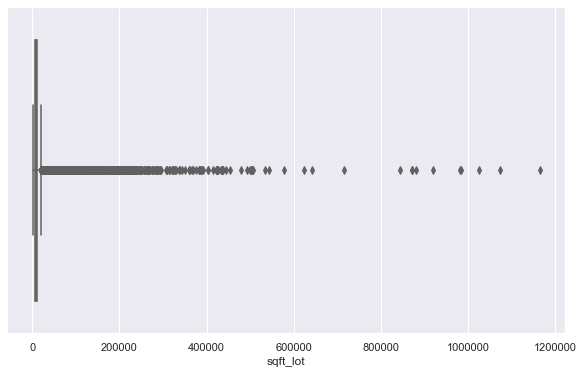

In [791]:
sns.boxplot(x=data['sqft_lot'], color='y')

### floors

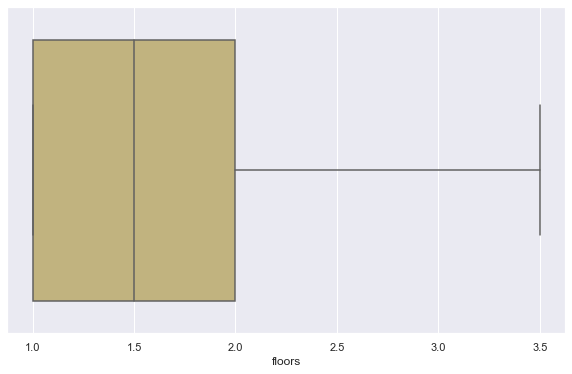

In [792]:
sns.boxplot(x=data['floors'], color='y')

### sqft_basement

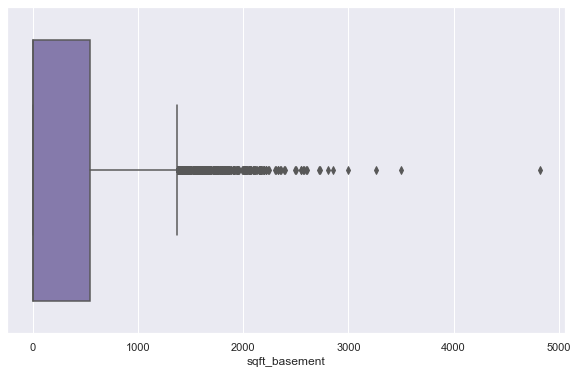

In [793]:
sns.boxplot(x=data['sqft_basement'], color='m')

That's a weird house with a HUGE basement. I'll drop it.

In [794]:
data.drop(data[data.sqft_basement > 4000].index, inplace = True) 

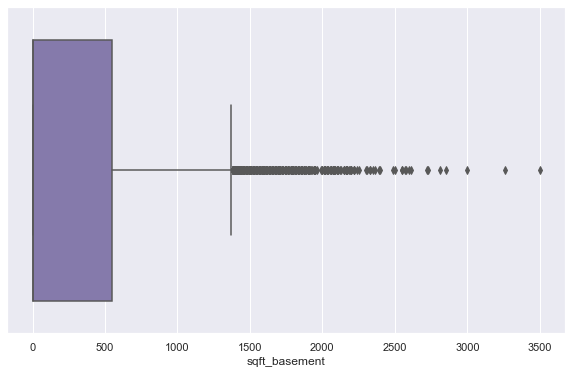

In [795]:
sns.boxplot(x=data['sqft_basement'], color='m')

In [796]:
data[data.bedrooms > 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
20527,520000.0,11,3.0,3000,4960,2.0,0.0,7,600.0,1918,1999,98106,24603,335,13.6


In [797]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_basement       float64
yr_built              int64
yr_renovated          int32
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
dtype: object

All the other ones look good

## Check collinearity again

Check for correlation again.

In [798]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
price,1.000000,0.315598,0.522522,0.699231,0.091866,0.258280,0.262205,0.670170,0.312823,0.056155,0.111895,-0.053989,-0.118603,-0.049503,0.090009
bedrooms,0.315598,1.000000,0.527208,0.593848,0.032226,0.183219,-0.003049,0.365273,0.301926,0.160997,0.017547,-0.158580,0.017224,-0.002788,-0.022919
bathrooms,0.522522,0.527208,1.000000,0.753824,0.092252,0.503084,0.060723,0.664949,0.272381,0.509269,0.044089,-0.205395,-0.059339,-0.000713,0.099432
sqft_living,0.699231,0.593848,0.753824,1.000000,0.178959,0.354631,0.101247,0.763837,0.421667,0.321026,0.046909,-0.201130,-0.092942,-0.028965,0.113511
sqft_lot,0.091866,0.032226,0.092252,0.178959,1.000000,-0.004253,0.022597,0.120772,0.013887,0.058052,0.005540,-0.132571,-0.153443,-0.106603,0.102045
floors,0.258280,0.183219,0.503084,0.354631,-0.004253,1.000000,0.021401,0.458678,-0.244604,0.489417,0.003579,-0.059596,-0.034650,0.037207,0.111827
waterfront,0.262205,-0.003049,0.060723,0.101247,0.022597,0.021401,1.000000,0.081136,0.078017,-0.024820,0.071301,0.029421,-0.035499,-0.035102,-0.003166
grade,0.670170,0.365273,0.664949,0.763837,0.120772,0.458678,0.081136,1.000000,0.162099,0.448553,0.013647,-0.185947,-0.070072,-0.008479,0.099802
sqft_basement,0.312823,0.301926,0.272381,0.421667,0.013887,-0.244604,0.078017,0.162099,1.000000,-0.130739,0.061182,0.074011,-0.001502,-0.019013,-0.046106
yr_built,0.056155,0.160997,0.509269,0.321026,0.058052,0.489417,-0.024820,0.448553,-0.130739,1.000000,-0.202469,-0.347290,-0.024699,0.054172,0.153171


In [799]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Only things like sqft_living, grade, and bathrooms. But I don't want to delete those.

# Categorical Data

## Find which columns are categorical

In [800]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_basement       float64
yr_built              int64
yr_renovated          int32
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
dtype: object

In [804]:
categorical = ['bedrooms', 'floors', 'waterfront', 'grade', 'bathrooms']


In [814]:
del zip

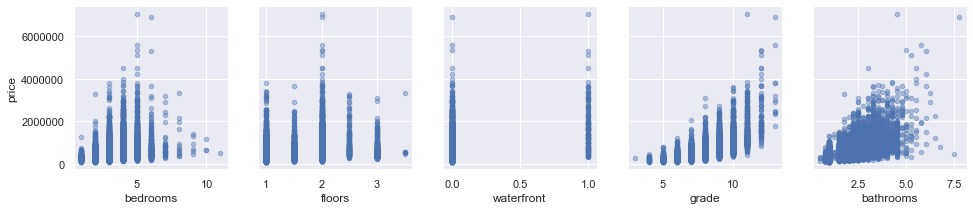

In [810]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))
for xcol, ax in zip(categorical, axes):
    data.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='b')

Actually, I won't consider bathrooms to be categorical

### convert yr_renovated to categorical

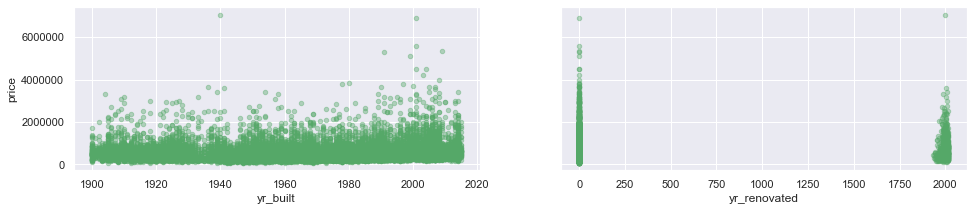

In [815]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'yr_renovated'], axes):
    data.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='g')

yr_renovated looks weird. Will make it bigger.

In [816]:
new_renov = data[data.yr_renovated > 0] 

In [817]:
new_renov.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score
9,290900.0,2,2.0,1610,17600,2.0,0.0,6,0.0,1930,1983,98178,25363,262,10.3


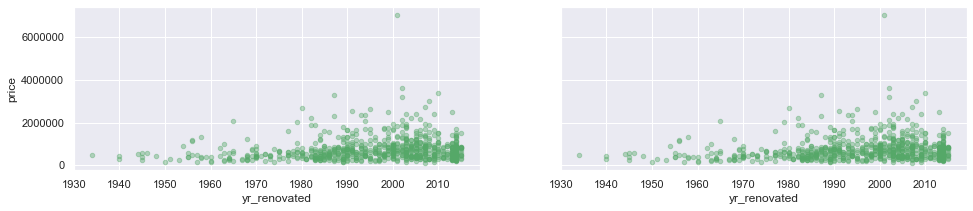

In [818]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['yr_renovated', 'yr_renovated'], axes.flatten()):
    new_renov.plot(kind='scatter', x=xcol, y='price', sharey=True, ax=ax, alpha=0.4, color='g')

I'm going to create a new column 'recent_renov' and set 1990 as a cut off year. 25 years ago.

In [819]:
data['recent_renov'] = [1 if x >= 1990 else 0 for x in data['yr_renovated']]

In [820]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0.0,7,0.0,1955,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0.0,6,0.0,1945,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0.0,8,480.0,1967,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0.0,7,0.0,1961,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0.0,6,0.0,1931,0,98178,25363,262,10.3,0


## Most expensive houses

Curious, what sort of houses are the most expensive?

In [821]:
data.sort_values(by=['price'], ascending=False).head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
13576,7060000.0,5,4.50,10040,37325,2.0,1.0,11,2360.0,1940,2001,98004,32587,317,9.7,1
21560,6890000.0,6,7.75,9890,31374,2.0,0.0,13,1030.0,2001,0,98039,3120,50,16.0,0
21552,5570000.0,5,5.75,9200,35069,2.0,0.0,13,3000.0,2001,0,98039,3120,50,16.0,0
13533,5350000.0,5,5.00,8000,23985,2.0,0.0,12,1280.0,2009,0,98004,32587,317,9.7,0
6345,5300000.0,6,6.00,7390,24829,2.0,1.0,12,2390.0,1991,0,98040,24120,282,11.7,0


In the Belleview or Medina areas, which I guess are wealthy suburbs

## One-hot encode categorical

In [822]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront          float64
grade                 int64
sqft_basement       float64
yr_built              int64
yr_renovated          int32
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
recent_renov          int64
dtype: object

I've already done:
- "recent_renov"  

I'll do:  
- "waterfront" 

Maybe: 
- "grade"  

Should I do:
- bedrooms?  
- floors?  
- yr_built?   

### Waterfront

It actually seems waterfront is already in 1's and 0's. I'll just convert them to an integer.

In [823]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0.0,7,0.0,1955,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0.0,6,0.0,1945,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0.0,8,480.0,1967,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0.0,7,0.0,1961,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0.0,6,0.0,1931,0,98178,25363,262,10.3,0


In [824]:
data.waterfront.nunique()

2

In [825]:
data.waterfront = data.waterfront.astype(int)

In [826]:
data.waterfront.nunique()

2

In [827]:
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='waterf', drop_first=True)

In [828]:
waterfront_dummies.sort_values(by=['waterf_1'])

,waterf_1
0,0
14397,0
14396,0
14395,0
14394,0
...,...
2580,1
202,1
12334,1
2499,1


### Grade

First, check a histogram

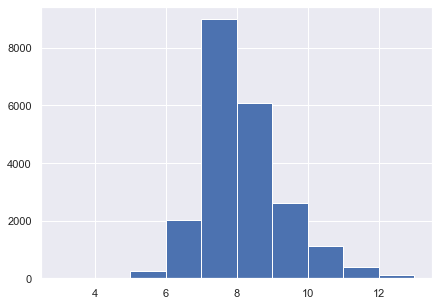

In [829]:
data['grade'].hist(figsize=[7,5])

It seems fairly normally distributed. I won't change it for now.

### Other categories (bedroom, floors)

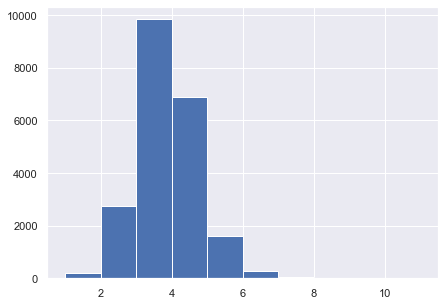

In [830]:
data['bedrooms'].hist(figsize=[7,5])

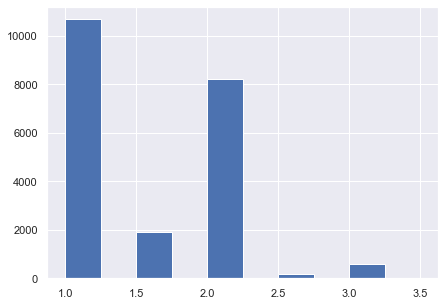

In [831]:
data['floors'].hist(figsize=[7,5])

In [832]:
data.floors.nunique()

6

In [833]:
floors = data.floors.tolist()

In [834]:
np.unique(floors)

array([1. , 1.5, 2. , 2.5, 3. , 3.5])

It might be worth setting these to a categorical variables. But first let me check the correlation between floors and price. I don't seeing it matter that much, as opposed to something like square feet.

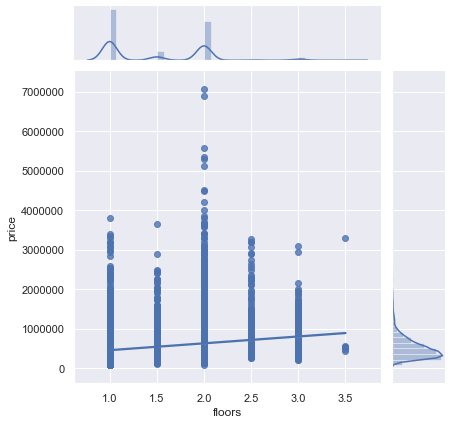

In [835]:
sns.jointplot(x = data.floors,y=data.price, kind='reg')

It's almost flat, and only seems to matter in houses below $1 mil. 

In [836]:

under_mil = data[data.price < 1000000]
under_mil.shape


(20105, 16)

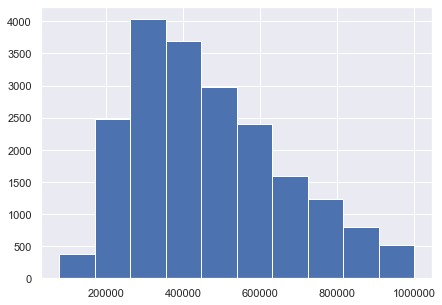

In [837]:
# data['floors'].hist(figsize=[7,5])
under_mil.price.hist(figsize=[7,5])

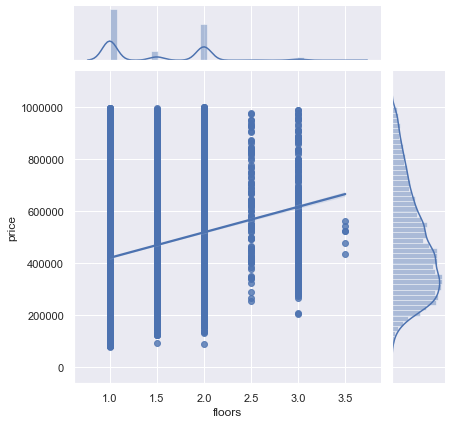

In [838]:
sns.jointplot(x = under_mil.floors, y = under_mil.price, kind='reg')

Just wanted to check the under $1 mil houses. The correlation does seem stronger in this group. Will leave alone for now.

## Check for collinearity again

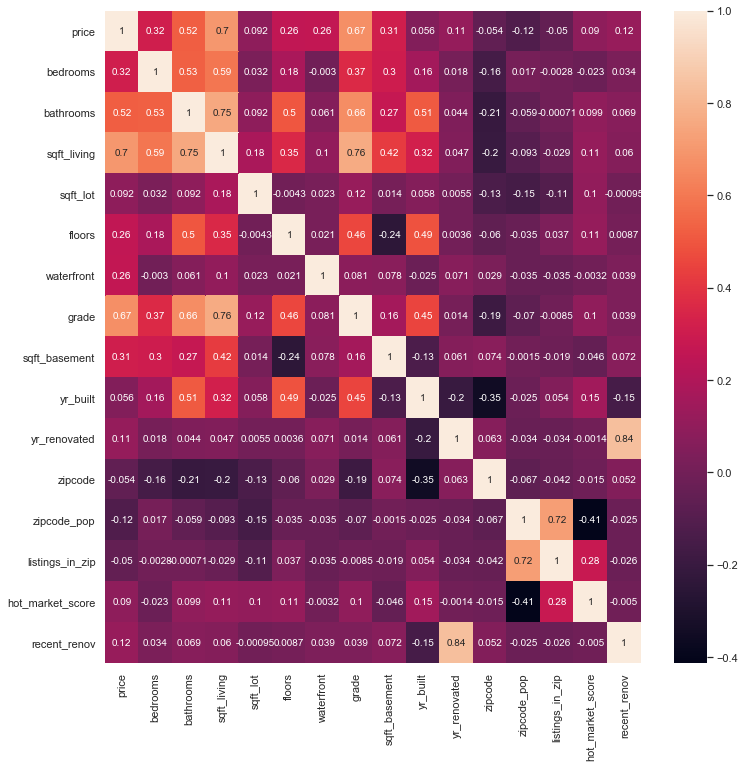

In [839]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True);

There does seem to be a strong collinearity between `listings_in_zip` and `zipcode_pop`, but that's to be expected.

# Export data

Now that I've finished with the cleaning and EDA, I'll export it so I can start over in new notebook.

In [840]:
# check it one more time
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,98178,25363,262,10.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2720000.0,4,3.25,3990,18115,2.0,0,11,0.0,1989,0,98039,3120,50,16.0,0
21593,1950000.0,4,3.50,4065,18713,2.0,0,10,0.0,1987,0,98039,3120,50,16.0,0
21594,2250000.0,5,5.25,3410,8118,2.0,0,11,0.0,2006,0,98039,3120,50,16.0,0
21595,2900000.0,5,4.00,5190,14600,2.0,0,11,0.0,2013,0,98039,3120,50,16.0,0


In [841]:
data.to_csv('kc_house_data_cleaned.csv')